In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Loading dataset
We chose the standard mnist dataset from keras for training our model

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

# Creating a model
- An input layer with input as the reshaped data of given data
- Add a hidden layer with 100 nodes and choose **ReLU** activation function
- Add output layer with 10 nodes, each determing the digit and choose **sigmoid** as activation function

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

We take crossentropy as a measure of loss, and choose adam as our optimizer to optimize our model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

To avoid overfitting we divide our 20% of our training data as validation data

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3022 - accuracy: 0.9136 - val_loss: 0.1700 - val_accuracy: 0.9510
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1382 - accuracy: 0.9596 - val_loss: 0.1259 - val_accuracy: 0.9619
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0947 - accuracy: 0.9724 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0718 - accuracy: 0.9787 - val_loss: 0.1004 - val_accuracy: 0.9673
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0892 - val_accuracy: 0.9726
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0429 - accuracy: 0.9874 - val_loss: 0.0958 - val_accuracy: 0.9721
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0926 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


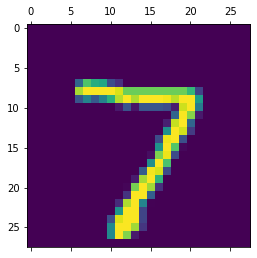

In [ ]:
model.evaluate(X_test,y_test)
predicted = model.predict(X_test)
plt.matshow(X_test[0])

Our model has an accuracy of **97.70%** on unseen test data

In [ ]:
print("Predicted digit is ",np.argmax(predicted[0]))

Predicted digit is  7


# Plots

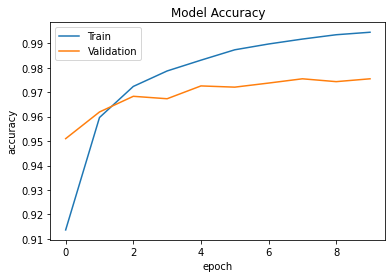

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

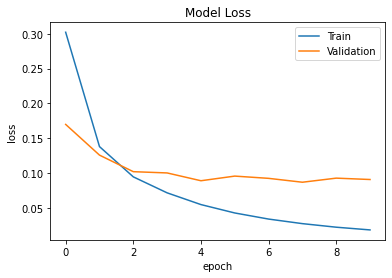

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()